In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [2]:
FOLDER = 'E:/diss/jeopardy/'
GRAPHS = 'C:/Users/Mr Barrett/Dropbox/Diss/graphs/'

In [3]:
df_negation = pd.read_csv(FOLDER + "jeopardy_negation.csv")
df_negation

,compname,ncd_formula,predictor,seqpart,seqpart_size,num_instances,tp,tn,fp,fn
0,BERT-L2R,inf-dist,1-NN,0,195238,6012,6012,189226,0,0
1,BERT-L2R,inf-dist,1-NN,1,10846,354,48,9327,1165,306
2,BERT-L2R,inf-dist,1-NN,2,10846,313,31,9380,1153,282
3,BERT-L2R-reverse,inf-dist,1-NN,0,195238,6012,6012,189226,0,0
4,BERT-L2R-reverse,inf-dist,1-NN,1,10846,354,50,9660,832,304
5,BERT-L2R-reverse,inf-dist,1-NN,2,10846,313,44,9651,882,269
6,BERT-Cut-Sort,inf-dist,1-NN,0,195238,6012,6012,189226,0,0
7,BERT-Cut-Sort,inf-dist,1-NN,1,10846,354,43,9327,1165,311
8,BERT-Cut-Sort,inf-dist,1-NN,2,10846,313,26,9380,1153,287
9,BERT-Cut-Sort-reverse,inf-dist,1-NN,0,195238,6012,6012,189226,0,0


In [4]:
df_negation["modal_acc"] = 1.0 - df_negation["num_instances"] / df_negation["seqpart_size"]
df_negation["acc"] = (df_negation["tp"] + df_negation["tn"]) / df_negation["seqpart_size"]
df_negation["precision"] = df_negation["tp"] / (df_negation["tp"] + df_negation["fp"])
df_negation["recall"] = df_negation["tp"] / (df_negation["tp"] + df_negation["fn"])
df_negation["f1"] = df_negation["tp"] / (df_negation["tp"] + 0.5 * (df_negation["fp"] + df_negation["fn"]))

In [5]:
df_val_negation = df_negation[df_negation["seqpart"] == 1]
df_test_negation = df_negation[df_negation["seqpart"] == 2]

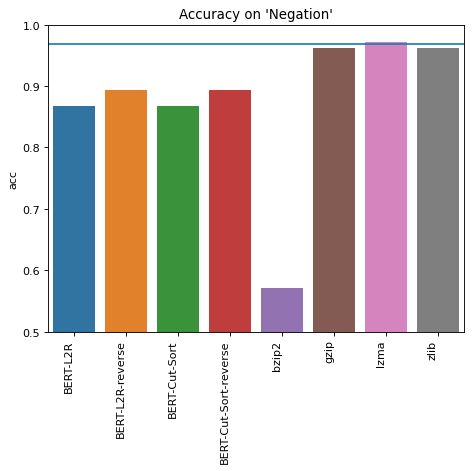

In [8]:
y_axis = "acc"
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=80)

sns.barplot(data=df_test_negation,
            x="compname", y=y_axis, ax=ax)

ax.set_xlabel('')
ax.set_ylabel(y_axis)
ax.set_ylim((0.5, 1.0))
ax.axhline(y=df_negation["modal_acc"].values[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title("Accuracy on 'Negation'")

fig.tight_layout()
plt.savefig(GRAPHS + f"jeopardy-negation.svg", format="svg", bbox_inches='tight')
plt.show()

In [10]:
df_slen = pd.read_csv(FOLDER + "jeopardy_slen.csv")
df_slen

,compname,ncd_formula,predictor,val_num_correct,val_num_modal,val_total,test_num_correct,test_num_modal,test_total
0,BERT-L2R,norm-inf-dist-2,1-NN,82,134,481,81,157,510
1,BERT-L2R-reverse,norm-inf-dist-2,1-NN,93,134,481,100,157,510
2,BERT-Cut-Sort,norm-inf-dist-2,1-NN,71,134,481,74,157,510
3,BERT-Cut-Sort-reverse,norm-inf-dist-2,1-NN,90,134,481,93,157,510
4,bzip2,norm-inf-dist-2,1-NN,111,134,481,117,157,510
5,gzip,norm-inf-dist-2,1-NN,106,134,481,118,157,510
6,lzma,norm-inf-dist-2,1-NN,126,134,481,119,157,510
7,zlib,norm-inf-dist-2,1-NN,115,134,481,125,157,510


In [11]:
df_slen["val_acc"] = df_slen["val_num_correct"] / df_slen["val_total"]
df_slen["test_acc"] = df_slen["test_num_correct"] / df_slen["test_total"]
df_slen["val_modal_acc"] = df_slen["val_num_modal"] / df_slen["val_total"]
df_slen["test_modal_acc"] = df_slen["test_num_modal"] / df_slen["test_total"]

In [12]:
df_slen["test_modal_acc"].values[0]

0.307843137254902

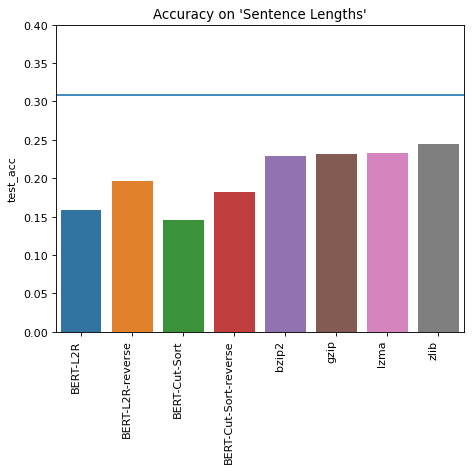

In [14]:
y_axis = "test_acc"
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=80)

sns.barplot(data=df_slen,
            x="compname", y=y_axis, ax=ax)

ax.axhline(y=df_slen["test_modal_acc"].values[0])
ax.set_xlabel('')
ax.set_ylabel(y_axis)
ax.set_ylim((0.0, 0.4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title("Accuracy on 'Sentence Lengths'")

fig.tight_layout()
plt.savefig(GRAPHS + f"jeopardy-slen.svg", format="svg", bbox_inches='tight')
plt.show()